In [7]:
import pandas as pd

data = pd.read_csv("customer_segmentation_data.csv")

In [8]:
#some basic information to start EDA

print("Some basic info about the data: ")
print(data.info())

Some basic info about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB
None


In [9]:
print("Header of first few rows: ")
print(data.head())

Header of first few rows: 
   minutes_watched     CLV  region  channel
0           3197.0  205.42       2        4
1             63.0  149.99       0        1
2            605.0  119.00       2        2
3             20.0  240.00       2        4
4            245.0  184.36       1        4


In [10]:
print("Some basic statistics:")
print(data.describe())

Some basic statistics:
       minutes_watched          CLV       region      channel
count      3725.000000  3834.000000  3834.000000  3834.000000
mean       1972.094497   118.383920     1.167188     3.870370
std        7401.693028    70.471274     0.923055     2.191972
min           0.000000     0.000000     0.000000     1.000000
25%         159.000000    62.580000     0.000000     2.000000
50%         512.000000   119.000000     2.000000     3.000000
75%        1521.000000   149.990000     2.000000     6.000000
max      288508.000000   626.400000     2.000000     8.000000


In [12]:
#do a check to see if there are any missing values
print("Missing values: ")
print(data.isnull().sum())

Missing values: 
minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64


In [14]:
#Data Cleaning
#Only missing values are in the minutes_watched column. We assume these are likely users who haven't watch any of the
#video content even though they entered the program. Thus, instead of the deleting these entries, we will just fill them in
#with zeros

data['minutes_watched'] = data['minutes_watched'].fillna(0) #fill in missing entries with 0

#make sure there are no more missing values
print("Updated Missing values: ")
print(data.isnull().sum())

Updated Missing values: 
minutes_watched    0
CLV                0
region             0
channel            0
dtype: int64


In [18]:
categories = ['region', 'channel'] 

for col in categories:
    print(f"Unique Values for {col} category: {data[col].unique()}")

Unique Values for region category: [2 0 1]
Unique Values for channel category: [4 1 2 3 8 6 7 5]


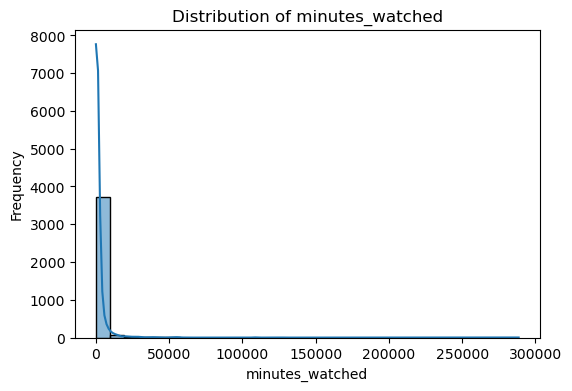

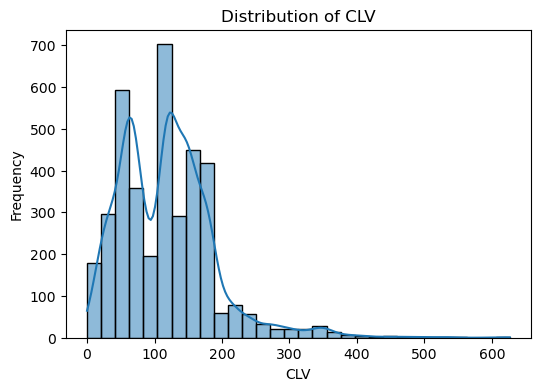

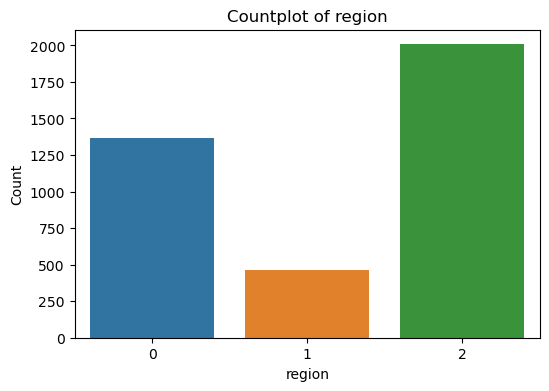

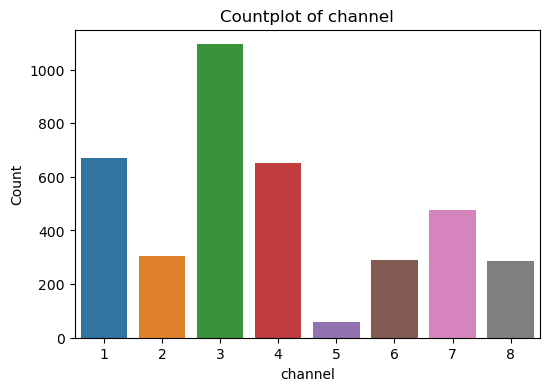

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical columns
numerical_columns = ['minutes_watched', 'CLV']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Countplot for categorical columns
categorical_columns = ['region', 'channel']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

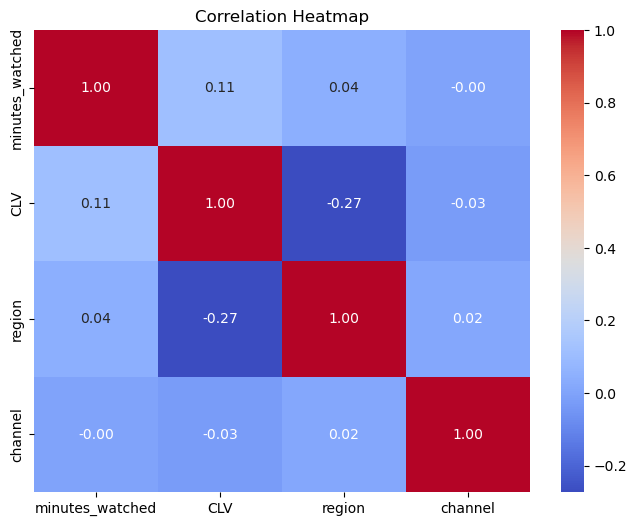

In [20]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

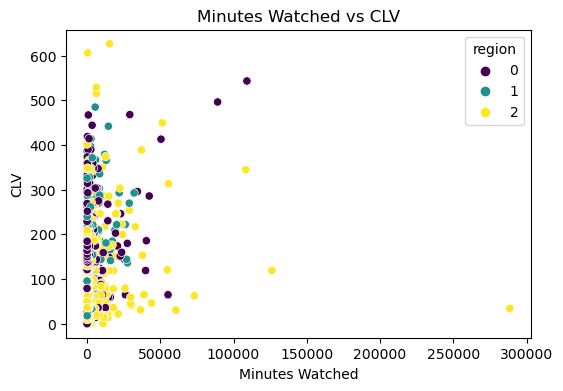

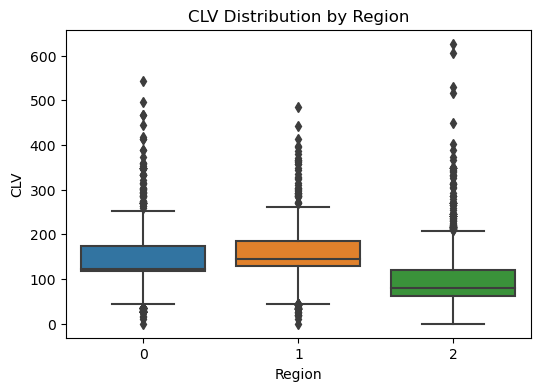

In [21]:
# Scatter plot between 'minutes_watched' and 'CLV'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='minutes_watched', y='CLV', data=data, hue='region', palette='viridis')
plt.title("Minutes Watched vs CLV")
plt.xlabel('Minutes Watched')
plt.ylabel('CLV')
plt.show()

# Boxplot for 'CLV' across 'region'
plt.figure(figsize=(6, 4))
sns.boxplot(x='region', y='CLV', data=data)
plt.title("CLV Distribution by Region")
plt.xlabel('Region')
plt.ylabel('CLV')
plt.show()

In [22]:
# Group by 'region' and calculate mean 'CLV' and 'minutes_watched'
grouped_stats = data.groupby('region')[['CLV', 'minutes_watched']].mean().reset_index()
print("\nGrouped Statistics (Mean CLV and Minutes Watched by Region):")
print(grouped_stats)


Grouped Statistics (Mean CLV and Minutes Watched by Region):
   region         CLV  minutes_watched
0       0  136.618463      1552.462665
1       1  158.142408      1823.058568
2       2   96.840797      2184.832088


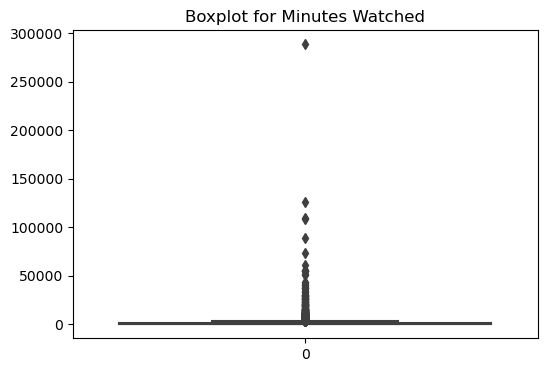


Number of Outliers in 'minutes_watched': 437


In [23]:
# Boxplot for 'minutes_watched'
plt.figure(figsize=(6, 4))
sns.boxplot(data['minutes_watched'])
plt.title("Boxplot for Minutes Watched")
plt.show()

# Detect outliers using IQR
Q1 = data['minutes_watched'].quantile(0.25)
Q3 = data['minutes_watched'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['minutes_watched'] < lower_bound) | (data['minutes_watched'] > upper_bound)]
print(f"\nNumber of Outliers in 'minutes_watched': {len(outliers)}")

In [24]:
# Create bins for 'minutes_watched'
bins = [0, 500, 2000, data['minutes_watched'].max()]
labels = ['Low', 'Medium', 'High']
data['watch_category'] = pd.cut(data['minutes_watched'], bins=bins, labels=labels)

# Verify the new column
print(data[['minutes_watched', 'watch_category']].head())

   minutes_watched watch_category
0           3197.0           High
1             63.0            Low
2            605.0         Medium
3             20.0            Low
4            245.0            Low


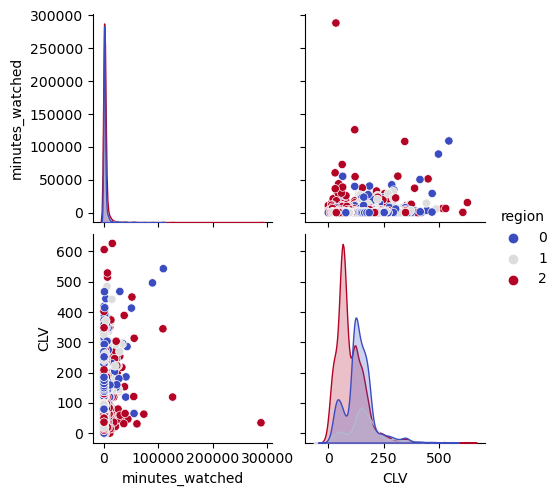

In [25]:
# Pairplot to visualize relationships between features
sns.pairplot(data, vars=['minutes_watched', 'CLV'], hue='region', palette='coolwarm')
plt.show()

In [26]:
from scipy.stats import skew

# Calculate skewness for numerical features
for col in numerical_columns:
    col_skew = skew(data[col].dropna())
    print(f"Skewness of {col}: {col_skew:.2f}")

Skewness of minutes_watched: 20.76
Skewness of CLV: 1.35


C:\Users\Justin\AppData\Local\Temp\ipykernel_47164\1621651507.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='CLV', data=data, ci=None, palette='pastel')


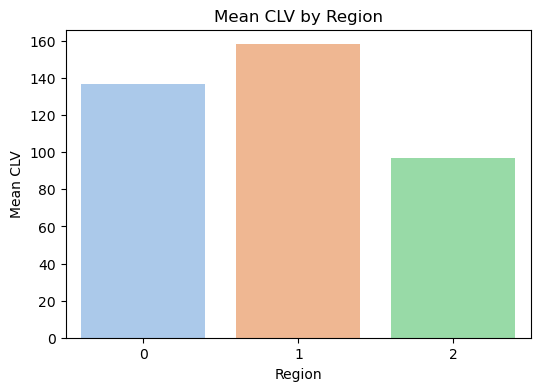

C:\Users\Justin\AppData\Local\Temp\ipykernel_47164\1621651507.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='channel', y='CLV', data=data, ci=None, palette='muted')


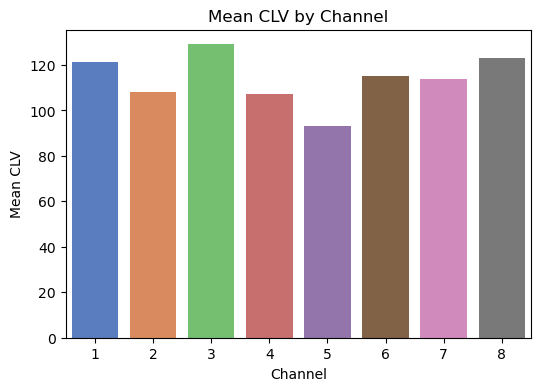

In [27]:
# Bar plot for mean CLV by region
plt.figure(figsize=(6, 4))
sns.barplot(x='region', y='CLV', data=data, ci=None, palette='pastel')
plt.title("Mean CLV by Region")
plt.xlabel('Region')
plt.ylabel('Mean CLV')
plt.show()

# Bar plot for mean CLV by channel
plt.figure(figsize=(6, 4))
sns.barplot(x='channel', y='CLV', data=data, ci=None, palette='muted')
plt.title("Mean CLV by Channel")
plt.xlabel('Channel')
plt.ylabel('Mean CLV')
plt.show()

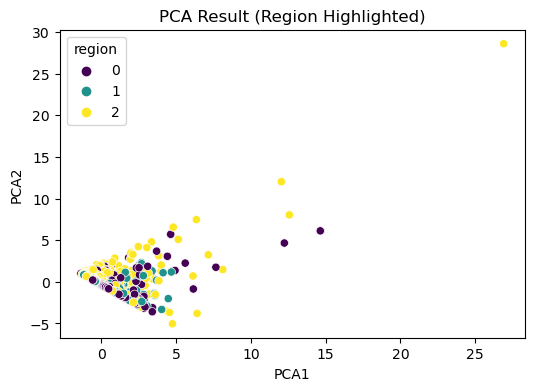

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = data[['minutes_watched', 'CLV']]
scaled_features = StandardScaler().fit_transform(numerical_features)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data['PCA1'], data['PCA2'] = pca_result[:, 0], pca_result[:, 1]

# Scatterplot of PCA results
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='region', data=data, palette='viridis')
plt.title("PCA Result (Region Highlighted)")
plt.show()

In [29]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = encoder.fit_transform(data[['region', 'channel']])
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['region', 'channel']))

# Concatenate encoded columns with the original dataset
data = pd.concat([data.reset_index(drop=True), encoded_cols_df], axis=1)
data.drop(['region', 'channel'], axis=1, inplace=True)

print("\nDataset after encoding:")
print(data.head())


Dataset after encoding:
   minutes_watched     CLV watch_category      PCA1      PCA2  region_1  \
0           3197.0  205.42           High  0.997476 -0.749387       0.0   
1             63.0  149.99            Low  0.137736 -0.496616       0.0   
2            605.0  119.00         Medium -0.120772 -0.133137       0.0   
3             20.0  240.00            Low  1.036848 -1.404055       0.0   
4            245.0  184.36            Low  0.500273 -0.823904       1.0   

   region_2  channel_2  channel_3  channel_4  channel_5  channel_6  channel_7  \
0       1.0        0.0        0.0        1.0        0.0        0.0        0.0   
1       0.0        0.0        0.0        0.0        0.0        0.0        0.0   
2       1.0        1.0        0.0        0.0        0.0        0.0        0.0   
3       1.0        0.0        0.0        1.0        0.0        0.0        0.0   
4       0.0        0.0        0.0        1.0        0.0        0.0        0.0   

   channel_8  
0        0.0  
1      

C:\Users\Justin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical columns
scaler = MinMaxScaler()
data[['minutes_watched', 'CLV']] = scaler.fit_transform(data[['minutes_watched', 'CLV']])

print("\nDataset after scaling:")
print(data.head())


Dataset after scaling:
   minutes_watched       CLV watch_category      PCA1      PCA2  region_1  \
0         0.011081  0.327937           High  0.997476 -0.749387       0.0   
1         0.000218  0.239448            Low  0.137736 -0.496616       0.0   
2         0.002097  0.189974         Medium -0.120772 -0.133137       0.0   
3         0.000069  0.383142            Low  1.036848 -1.404055       0.0   
4         0.000849  0.294317            Low  0.500273 -0.823904       1.0   

   region_2  channel_2  channel_3  channel_4  channel_5  channel_6  channel_7  \
0       1.0        0.0        0.0        1.0        0.0        0.0        0.0   
1       0.0        0.0        0.0        0.0        0.0        0.0        0.0   
2       1.0        1.0        0.0        0.0        0.0        0.0        0.0   
3       1.0        0.0        0.0        1.0        0.0        0.0        0.0   
4       0.0        0.0        0.0        1.0        0.0        0.0        0.0   

   channel_8  
0        0.

In [31]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['CLV'])  # Assuming 'CLV' is the target variable
y = data['CLV']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of Train/Test Splits:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shape of Train/Test Splits:
X_train: (3067, 13), X_test: (767, 13)
y_train: (3067,), y_test: (767,)


In [33]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns in the dataset:")
print(categorical_columns)


Categorical columns in the dataset:
Index([], dtype='object')


In [34]:
# Perform one-hot encoding on categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check the result
print("\nData after one-hot encoding:")
print(data.head())


Data after one-hot encoding:
   minutes_watched       CLV watch_category      PCA1      PCA2  region_1  \
0         0.011081  0.327937           High  0.997476 -0.749387       0.0   
1         0.000218  0.239448            Low  0.137736 -0.496616       0.0   
2         0.002097  0.189974         Medium -0.120772 -0.133137       0.0   
3         0.000069  0.383142            Low  1.036848 -1.404055       0.0   
4         0.000849  0.294317            Low  0.500273 -0.823904       1.0   

   region_2  channel_2  channel_3  channel_4  channel_5  channel_6  channel_7  \
0       1.0        0.0        0.0        1.0        0.0        0.0        0.0   
1       0.0        0.0        0.0        0.0        0.0        0.0        0.0   
2       1.0        1.0        0.0        0.0        0.0        0.0        0.0   
3       1.0        0.0        0.0        1.0        0.0        0.0        0.0   
4       0.0        0.0        0.0        1.0        0.0        0.0        0.0   

   channel_8  
0    

In [36]:
# Fill missing values in categorical columns with the most frequent category (mode)
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [40]:
# Verify if there are still any string values (i.e., object dtype columns)
non_numeric_columns_after_encoding = data.select_dtypes(exclude=['number']).columns
print("\nRemaining non-numeric columns after encoding:")
print(non_numeric_columns_after_encoding)


Remaining non-numeric columns after encoding:
Index(['watch_category'], dtype='object')


# Model Implementation

In [42]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the dataset (excluding the target variable 'CLV' if needed)
X = data.drop(columns=['CLV'])  # Exclude target column 'CLV' if it's used for clustering
X_scaled = scaler.fit_transform(X)

# Check the first few rows after scaling
print("\nScaled Data:")
print(X_scaled[:5])

ValueError: could not convert string to float: 'High'

In [43]:
# Identify non-numeric columns in the dataset
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("\nNon-numeric columns in the dataset:")
print(non_numeric_columns)


Non-numeric columns in the dataset:
Index(['watch_category'], dtype='object')


In [44]:
# One-hot encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check the encoded data
print("\nData after one-hot encoding:")
print(data_encoded.head())


Data after one-hot encoding:
   minutes_watched       CLV watch_category      PCA1      PCA2  region_1  \
0         0.011081  0.327937           High  0.997476 -0.749387       0.0   
1         0.000218  0.239448            Low  0.137736 -0.496616       0.0   
2         0.002097  0.189974         Medium -0.120772 -0.133137       0.0   
3         0.000069  0.383142            Low  1.036848 -1.404055       0.0   
4         0.000849  0.294317            Low  0.500273 -0.823904       1.0   

   region_2  channel_2  channel_3  channel_4  channel_5  channel_6  channel_7  \
0       1.0        0.0        0.0        1.0        0.0        0.0        0.0   
1       0.0        0.0        0.0        0.0        0.0        0.0        0.0   
2       1.0        1.0        0.0        0.0        0.0        0.0        0.0   
3       1.0        0.0        0.0        1.0        0.0        0.0        0.0   
4       0.0        0.0        0.0        1.0        0.0        0.0        0.0   

   channel_8  
0    

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# First, let's ensure your data is properly formatted as a dataframe
# Assuming your data is in a variable called 'data'
data = data.astype({
    'minutes_watched': 'float64',
    'CLV': 'float64',
    'region': 'int64',
    'channel': 'int64'
})

# Now separate features
X = data.drop(columns=['CLV'])  # Dropping CLV if it's your target variable

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# If you want to convert back to a dataframe with column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nScaled Data:")
print(X_scaled.head())

KeyError: "Only a column name can be used for the key in a dtype mappings argument. 'region' not found in columns."

In [47]:
print(data.columns)

Index(['minutes_watched', 'CLV', 'watch_category', 'PCA1', 'PCA2', 'region_1',
       'region_2', 'channel_2', 'channel_3', 'channel_4', 'channel_5',
       'channel_6', 'channel_7', 'channel_8'],
      dtype='object')


In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv("customer_segmentation_data.csv")

# Separate features (X) and target (CLV)
X = data.drop(columns=['CLV'])

# Apply scaling to appropriate columns
# We should only scale continuous variables (minutes_watched, PCA1, PCA2)
columns_to_scale = ['minutes_watched', 'PCA1', 'PCA2']

# Create a copy of X to preserve the binary columns
X_processed = X.copy()

# Scale only the continuous columns
scaler = StandardScaler()
X_processed[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# The one-hot encoded columns (region_1, region_2, channel_2, etc.) should not be scaled 
# since they are already binary (0 or 1)

print("\nScaled Data:")
print(X_processed.head())

KeyError: "['PCA1', 'PCA2'] not in index"

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv("customer_segmentation_data.csv")

# First, let's see what columns we actually have
print("Available columns:", list(data.columns))

# Only scale minutes_watched since it's the only continuous numerical column 
# (other columns appear to be one-hot encoded categorical variables)
columns_to_scale = ['minutes_watched']

# Separate features (X) and target (CLV)
X = data.drop(columns=['CLV'])

# Create a copy of X to preserve the binary columns
X_processed = X.copy()

# Scale only the continuous column
scaler = StandardScaler()
X_processed[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

print("\nScaled Data:")
print(X_processed.head())

Available columns: ['minutes_watched', 'CLV', 'region', 'channel']

Scaled Data:
   minutes_watched  region  channel
0         0.165512       2        4
1        -0.257961       0        1
2        -0.184725       2        2
3        -0.263772       2        4
4        -0.233369       1        4


In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Load and prepare data
data = pd.read_csv("customer_segmentation_data.csv")
columns_to_scale = ['minutes_watched']

# Separate features (X) and target (CLV)
X = data.drop(columns=['CLV'])

# Create a copy of X to preserve the binary columns
X_processed = X.copy()

# Scale only the continuous column
scaler = StandardScaler()
X_processed[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Create the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(X_processed.values, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

ValueError: The condensed distance matrix must contain only finite values.

<Figure size 1000x700 with 0 Axes>

In [55]:
missing_values = np.isnan(X_processed).any()  # Check for NaN
infinite_values = np.isinf(X_processed).any()  # Check for infinity

print(f"Missing values present: {missing_values}")
print(f"Infinite values present: {infinite_values}")

Missing values present: minutes_watched     True
region             False
channel            False
dtype: bool
Infinite values present: minutes_watched    False
region             False
channel            False
dtype: bool


In [58]:
#fill the empty entries with 0s, even though i thought i did this alr
X_processed['minutes_watched'] = X_processed['minutes_watched'].fillna(0)

print("\nMissing values in 'minutes_watched' after filling with 0:")
print(X_processed['minutes_watched'].isnull().sum())


Missing values in 'minutes_watched' after filling with 0:
0


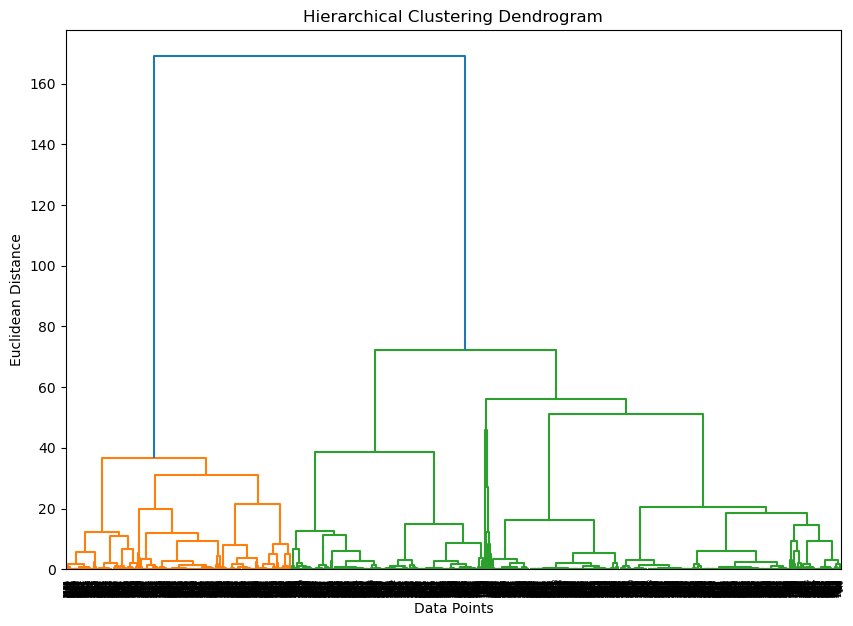

In [74]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Create the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(X_processed, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

C:\Users\Justin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Justin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Justin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Justin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Justin\anaconda3\Lib\site-packages\sklearn\

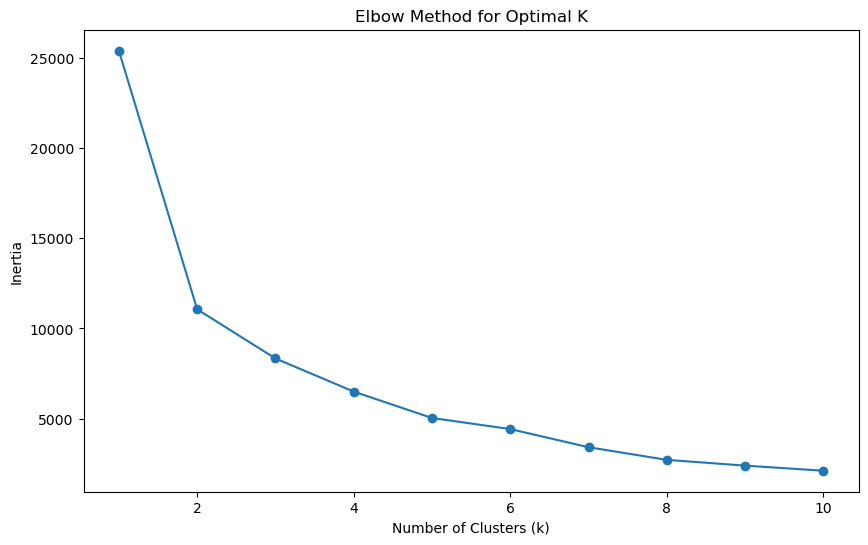

In [65]:
#Elbow method for K-means clustering

import warnings

from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Testing cluster sizes from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [67]:
# Based on the Elbow method or Hierarchical clustering, assume k = 3
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans_labels = kmeans.fit_predict(X_processed)

# Add the cluster labels to the original dataset
data['KMeans_Cluster'] = kmeans_labels

# Check the results
print("\nK-means Clustering Results:")
print(data[['CLV', 'KMeans_Cluster']].head())


C:\Users\Justin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



K-means Clustering Results:
      CLV  KMeans_Cluster
0  205.42               0
1  149.99               2
2  119.00               7
3  240.00               0
4  184.36               0


In [69]:
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering with the same number of clusters as determined by K-means (e.g., 3)
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_processed)

# Add the hierarchical labels to the data
data['Hierarchical_Cluster'] = hierarchical_labels

# Check the results
print("\nHierarchical Clustering Results:")
print(data[['CLV', 'Hierarchical_Cluster']].head())

C:\Users\Justin\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(



Hierarchical Clustering Results:
      CLV  Hierarchical_Cluster
0  205.42                     0
1  149.99                     2
2  119.00                     2
3  240.00                     0
4  184.36                     0


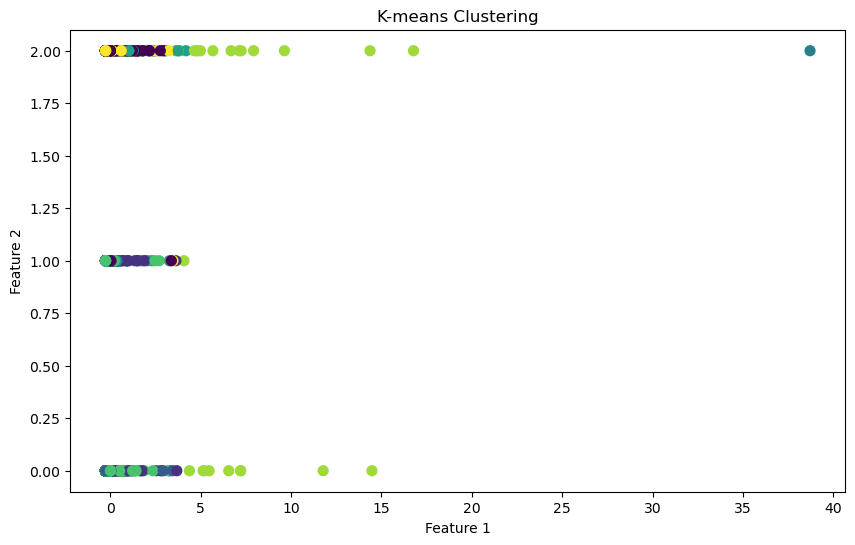

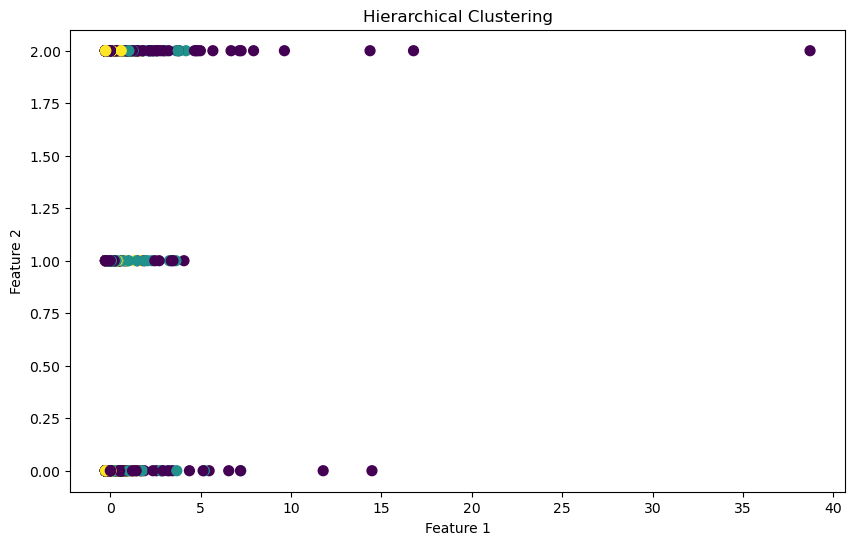

In [73]:
# Convert DataFrame to NumPy array
X_array = X_processed.values

plt.figure(figsize=(10, 6))
plt.scatter(X_array[:, 0], X_array[:, 1], c=data['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_array[:, 0], X_array[:, 1], c=data['Hierarchical_Cluster'], cmap='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()